# Image Compression using K-means Clustering

### 1 - K-means clustering implementation using numpy

#### 1.1 Importing Libraries

In [12]:
# import required libraries
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.2 Process of K-means 

- Randomly initialize K centroids from data 
- Find the centroid near to each data point
- Calculate the mean of all points corresponding to each centroid and move the centroid to that position
- Calculate the Distortion cost 
- Then Repeat the process from step 2 until the cost stops decreasing (It should not increase)

#### 1.3 Function for finding nearest centroids for each data point (`x[i]`)

In [14]:
def find_closest_centroids(x, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        x (ndarray): (m, n) Input values      
        centroids (ndarray): (k, n) k centroids 
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0]
    
    idx = np.zeros(x.shape[0],dtype=int)
    
    for i in (range(x.shape[0])):
        dist = np.zeros(K)
        for j in range(K):
            dist[j] = np.linalg.norm(x[i]-centroids[j])
        idx[i] = np.argmin(dist)
    
    return(idx)

#### 1.4 Computing means for each centroid

In [15]:
def compute_centroids(x, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m,n = np.shape(x)
    
    centroids = np.zeros((K,n))
    
    weights = np.zeros(K)
    
    for i in (range(m)):
        centroids[idx[i]] = centroids[idx[i]] + x[i]
        weights[idx[i]] = weights[idx[i]] + 1
    
    for k in range(K):
        centroids[k] = centroids[k]/weights[k]
        
    return centroids

#### 1.5 Random initialization of K centroids from data

In [16]:
def random_init(x,k):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    randomindex = np.random.permutation(x.shape[0])
    centroids = x[randomindex[:k]]
    return centroids

#### 1.6 Running K means 

In [17]:
def run_kMeans(x, k, no_of_iters):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    
    k is number of desired clusters 
    
    no_of_iters is number of iterations to run the algorithm
    """
    # m,n = np.shape(x)
    
    centroids = random_init(x,k)
    
    for i in tqdm(range(no_of_iters)):
        print("K-Means iteration %d/%d" % (i, no_of_iters-1))
        idx = find_closest_centroids(x, centroids)
        centroids = compute_centroids(x,idx,k)
    return centroids,idx

### 2 - Image compression with K-means

#### 2.1 Read the Image

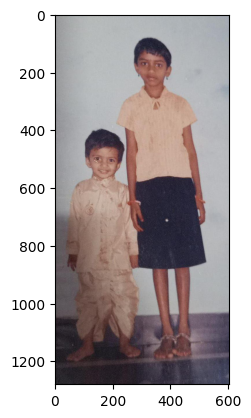

In [18]:
original_img = plt.imread('data/C3_W1/data/photo.jpg')
plt.imshow(original_img)

#### 2.2 Normalize and reshape the image

In [19]:
print("Shape of original_img is:", original_img.shape)
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Shape of original_img is: (1280, 603, 3)


#### 2.3 Running K-means for desired number of centroids and number of iterations

In [20]:
k = 20
max_iters = 50
initial_centroids = random_init(X_img, k)
centroids,idx = run_kMeans(X_img, k, max_iters)

  0%|          | 0/50 [00:00<?, ?it/s]

K-Means iteration 0/49


  2%|▏         | 1/50 [02:05<1:42:23, 125.39s/it]

K-Means iteration 1/49


  4%|▍         | 2/50 [04:00<1:35:19, 119.15s/it]

K-Means iteration 2/49


  6%|▌         | 3/50 [05:56<1:32:18, 117.84s/it]

K-Means iteration 3/49


  8%|▊         | 4/50 [07:54<1:30:19, 117.81s/it]

K-Means iteration 4/49


 10%|█         | 5/50 [09:49<1:27:48, 117.08s/it]

K-Means iteration 5/49


 12%|█▏        | 6/50 [11:47<1:25:51, 117.08s/it]

K-Means iteration 6/49


 14%|█▍        | 7/50 [13:41<1:23:23, 116.36s/it]

K-Means iteration 7/49


 16%|█▌        | 8/50 [15:38<1:21:33, 116.50s/it]

K-Means iteration 8/49


 18%|█▊        | 9/50 [17:35<1:19:45, 116.73s/it]

K-Means iteration 9/49


 20%|██        | 10/50 [19:31<1:17:37, 116.43s/it]

K-Means iteration 10/49


 22%|██▏       | 11/50 [21:29<1:15:58, 116.88s/it]

K-Means iteration 11/49


 24%|██▍       | 12/50 [23:24<1:13:42, 116.38s/it]

K-Means iteration 12/49


 26%|██▌       | 13/50 [25:21<1:11:54, 116.60s/it]

K-Means iteration 13/49


 28%|██▊       | 14/50 [27:19<1:10:08, 116.91s/it]

K-Means iteration 14/49


 30%|███       | 15/50 [29:22<1:09:12, 118.65s/it]

K-Means iteration 15/49


 32%|███▏      | 16/50 [31:19<1:07:02, 118.30s/it]

K-Means iteration 16/49


 34%|███▍      | 17/50 [33:14<1:04:25, 117.15s/it]

K-Means iteration 17/49


 36%|███▌      | 18/50 [35:11<1:02:33, 117.29s/it]

K-Means iteration 18/49


 38%|███▊      | 19/50 [37:06<1:00:09, 116.44s/it]

K-Means iteration 19/49


 40%|████      | 20/50 [39:03<58:15, 116.53s/it]  

K-Means iteration 20/49


 42%|████▏     | 21/50 [41:00<56:25, 116.75s/it]

K-Means iteration 21/49


 44%|████▍     | 22/50 [43:00<54:56, 117.73s/it]

K-Means iteration 22/49


 46%|████▌     | 23/50 [44:58<52:58, 117.72s/it]

K-Means iteration 23/49


 48%|████▊     | 24/50 [46:53<50:39, 116.92s/it]

K-Means iteration 24/49


 50%|█████     | 25/50 [48:49<48:41, 116.84s/it]

K-Means iteration 25/49


 52%|█████▏    | 26/50 [50:45<46:34, 116.46s/it]

K-Means iteration 26/49


 54%|█████▍    | 27/50 [52:39<44:20, 115.67s/it]

K-Means iteration 27/49


 56%|█████▌    | 28/50 [54:35<42:28, 115.84s/it]

K-Means iteration 28/49


 58%|█████▊    | 29/50 [56:32<40:37, 116.08s/it]

K-Means iteration 29/49


 60%|██████    | 30/50 [58:29<38:52, 116.64s/it]

K-Means iteration 30/49


 62%|██████▏   | 31/50 [1:00:23<36:38, 115.73s/it]

K-Means iteration 31/49


 64%|██████▍   | 32/50 [1:02:20<34:49, 116.09s/it]

K-Means iteration 32/49


 66%|██████▌   | 33/50 [1:04:13<32:36, 115.08s/it]

K-Means iteration 33/49


 68%|██████▊   | 34/50 [1:06:08<30:39, 115.00s/it]

K-Means iteration 34/49


 70%|███████   | 35/50 [1:07:57<28:18, 113.20s/it]

K-Means iteration 35/49


 72%|███████▏  | 36/50 [1:09:45<26:04, 111.77s/it]

K-Means iteration 36/49


 74%|███████▍  | 37/50 [1:11:38<24:16, 112.05s/it]

K-Means iteration 37/49


 76%|███████▌  | 38/50 [1:13:28<22:16, 111.40s/it]

K-Means iteration 38/49


 78%|███████▊  | 39/50 [1:15:21<20:33, 112.16s/it]

K-Means iteration 39/49


 80%|████████  | 40/50 [1:17:09<18:26, 110.65s/it]

K-Means iteration 40/49


 82%|████████▏ | 41/50 [1:19:01<16:41, 111.28s/it]

K-Means iteration 41/49


 84%|████████▍ | 42/50 [1:20:56<14:58, 112.33s/it]

K-Means iteration 42/49


 86%|████████▌ | 43/50 [1:22:51<13:11, 113.13s/it]

K-Means iteration 43/49


 88%|████████▊ | 44/50 [1:24:46<11:22, 113.71s/it]

K-Means iteration 44/49


 90%|█████████ | 45/50 [1:26:43<09:33, 114.73s/it]

K-Means iteration 45/49


 92%|█████████▏| 46/50 [1:28:37<07:37, 114.49s/it]

K-Means iteration 46/49


 94%|█████████▍| 47/50 [1:30:49<05:59, 119.74s/it]

K-Means iteration 47/49


 96%|█████████▌| 48/50 [1:33:00<04:06, 123.09s/it]

K-Means iteration 48/49


 98%|█████████▊| 49/50 [1:35:02<02:02, 122.70s/it]

K-Means iteration 49/49


100%|██████████| 50/50 [1:36:57<00:00, 116.36s/it]


#### 2.4 Retrieve the Image from returned data

In [21]:
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape) 
X_recovered = np.round(X_recovered)

#### 2.5 Display Compressed Image

Text(0.5, 1.0, 'Original')

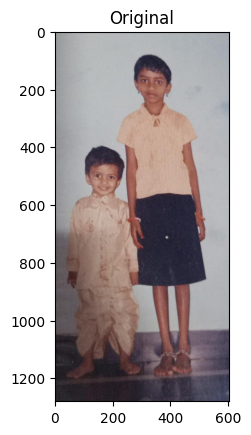

In [22]:
# original_img = np.round(original_img)
plt.imshow(original_img)
plt.title("Original")

Text(0.5, 1.0, 'Compressed with 20 colours')

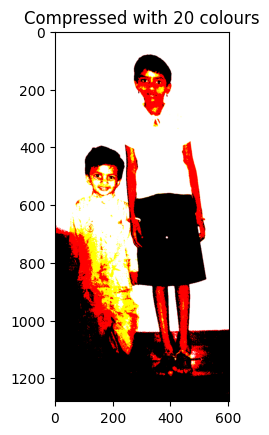

In [23]:
# Display compressed image
plt.imshow(X_recovered*255)
plt.title('Compressed with %d colours'%k)